In [50]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

In [51]:
excel_data_df = pd.ExcelFile(r'../data/sinno.xlsx')
excel_data_df = excel_data_df.parse(excel_data_df.sheet_names[0])

In [52]:
result_df = pd.ExcelFile(r'../data/sinno-result.xlsx')
result_df = result_df.parse(result_df.sheet_names[3])
result_set = result_df.iloc[:, 1].tolist()

In [53]:
# for idx, header in enumerate(excel_data_df.columns.tolist()):
#     print(idx, header)

In [54]:
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Nhân sự")]
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Đối ngoại")]
excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Chuyên môn")]
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Hậu cần")]
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Truyền thông")]
excel_data_df.reset_index(drop=True, inplace=True)
excel_data_df.fillna("", inplace = True)
# filter = [0, 1, 5, 7, 9, 11, 14, 15, 16, 17, 18, 19, 22, 23, 24, 26, 28, 30, 31, 33, 34, 35, 36, 37, 40, 41, 43, 44, 45, 52, 53, 55, 58, 60, 61, 65, 68, 69, 74, 77, 84, 86, 87, 88, 89, 96, 97, 98, 102, 104, 106, 107, 108, 110, 111, 112, 113, 114, 116, 117, 120, 127, 129, 134, 135, 137, 138, 139, 140, 140, 142, 145, 146, 149, 152, 154, 155]
# excel_data_df = excel_data_df.iloc[filter]
# excel_data_df.reset_index(drop=True, inplace=True)
# identity = list(excel_data_df.index.values)
identity = excel_data_df.iloc[:, 1].tolist()

In [55]:
import sys; sys.path.insert(0, '..')
from app.loader import Loader
from app.ssmc_fcm import SSMC_FCM
loader = Loader()

No GPU available, using the CPU instead.


Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [56]:
fields_chosen = {
    # # sample data
    # 2: (loader.feature_engineering, 1),

    # # egg data
    # 3: (loader.multilabel_binarizing, 1),
    # 4: (loader.multilabel_binarizing, 1),
    # 5: (loader.feature_engineering, 1),
    # 6: (loader.feature_engineering, 1),
    # 7: (loader.multilabel_binarizing, 1),
    # 8: (loader.multilabel_binarizing, 1),
    # 9: (loader.multilabel_binarizing, 1),
    # 10: (loader.feature_engineering, 1),

    # # nha data BCM
    # 40: (loader.feature_engineering, 1),
    # 43: (loader.feature_engineering, 1),
    # 46: (loader.feature_engineering, 1),
    # 49: (loader.feature_engineering, 1),
    # 55: (loader.feature_engineering, 1),
    # 58: (loader.feature_engineering, 1),

    # # nha data BCT
    # 41: (loader.feature_engineering, 1),
    # 44: (loader.feature_engineering, 1),
    # 47: (loader.feature_engineering, 1),
    # 50: (loader.feature_engineering, 1),
    # 62: (loader.feature_engineering, 1),
    # 65: (loader.feature_engineering, 1),
    # 68: (loader.feature_engineering, 1),
    # 71: (loader.feature_engineering, 1),

    # # nha data BDN
    # 41: (loader.feature_engineering, 1),
    # 44: (loader.feature_engineering, 1),
    # 47: (loader.feature_engineering, 1),
    # 50: (loader.feature_engineering, 1),
    # 74: (loader.feature_engineering, 1),
    # 77: (loader.feature_engineering, 1),
    # 80: (loader.feature_engineering, 1),

    # # sinno data nhan su
    # 10: (loader.feature_engineering, 1),
    # 18: (loader.feature_engineering, 1),
    # 19: (loader.feature_engineering, 1),
    # 20: (loader.multilabel_binarizing, 1),
    # 21: (loader.feature_engineering, 1),
    # 34: (loader.multilabel_binarizing, 1),
    # 35: (loader.feature_engineering, 1),
    # 36: (loader.feature_engineering, 1),
    # 37: (loader.feature_engineering, 1),
    # 38: (loader.feature_engineering, 1),

    # # sinno data doi ngoai
    # 10: (loader.feature_engineering, 1),
    # 29: (loader.feature_engineering, 1),
    # 30: (loader.feature_engineering, 1),
    # 31: (loader.feature_engineering, 1),
    # 32: (loader.feature_engineering, 1),
    # 34: (loader.multilabel_binarizing, 1),
    # 35: (loader.feature_engineering, 1),
    # 36: (loader.feature_engineering, 1),
    # 37: (loader.feature_engineering, 1),
    # 38: (loader.feature_engineering, 1),

    # sinno data chuyen mon
    10: (loader.feature_engineering, 1),
    13: (loader.feature_engineering, 1),
    14: (loader.feature_engineering, 1),
    15: (loader.feature_engineering, 1),
    16: (loader.feature_engineering, 1),
    17: (loader.feature_engineering, 1),
    34: (loader.multilabel_binarizing, 1),
    35: (loader.feature_engineering, 1),
    36: (loader.feature_engineering, 1),
    37: (loader.feature_engineering, 1),
    38: (loader.feature_engineering, 1),

    # # sinno data hau can
    # 10: (loader.feature_engineering, 1),
    # 33: (loader.feature_engineering, 1),
    # 39: (loader.feature_engineering, 1),
    # 40: (loader.feature_engineering, 1),
    # 34: (loader.multilabel_binarizing, 1),
    # 35: (loader.feature_engineering, 1),
    # 36: (loader.feature_engineering, 1),
    # 37: (loader.feature_engineering, 1),
    # 38: (loader.feature_engineering, 1),

    # # sinno data truyen thong
    # 10: (loader.feature_engineering, 1),
    # 22: (loader.feature_engineering, 1),
    # 23: (loader.feature_engineering, 1),
    # 24: (loader.feature_engineering, 1),
    # 25: (loader.feature_engineering, 1),
    # 26: (loader.feature_engineering, 1),
    # 34: (loader.multilabel_binarizing, 1),
    # 35: (loader.feature_engineering, 1),
    # 36: (loader.feature_engineering, 1),
    # 37: (loader.feature_engineering, 1),
    # 38: (loader.feature_engineering, 1),
}

In [57]:
from datetime import datetime
vectors = {}
for id_field, config in fields_chosen.items():
    start = datetime.now()
    func = config[0]
    raw_data = excel_data_df.iloc[:, id_field].tolist()
    data = func(raw_data)
    vectors[id_field] = data
    print(f"{round(100 * (list(fields_chosen).index(id_field) + 1) / len(fields_chosen), 2)}% ({datetime.now() - start})")

9.09% (0:00:01.309907)
18.18% (0:00:02.573469)
27.27% (0:00:02.167086)
36.36% (0:00:02.527136)
45.45% (0:00:02.592890)
54.55% (0:00:04.046829)
63.64% (0:00:00.000721)
72.73% (0:00:01.518911)
81.82% (0:00:01.851963)
90.91% (0:00:01.389513)
100.0% (0:00:01.577904)


In [58]:
cluster_fields = list(fields_chosen.keys())
dataset = None
data_field_len = []
data_field_weight = []
for idx, id_field in enumerate(cluster_fields):
    data = np.array(vectors[id_field])
    dataset = data if idx == 0 else np.hstack((dataset, data))
    data_field_len.append(data.shape[1])
    data_field_weight.append(fields_chosen[id_field][1])
dataset.shape, data_field_len, data_field_weight

((41, 7687),
 [768, 768, 768, 768, 768, 768, 7, 768, 768, 768, 768],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Supervised percentage: 0.0% (0:41)
Cluster members: 
['Nguyễn Đình Bắc', 'Vũ Khắc Long', 'Nguyễn Ngọc Dũng', 'Đào Nguyễn Huy Hoàng', 'Lê Thành Long', 'Trương Đăng Biển', 'Nguyễn Việt Anh', 'Ninh Thành Vinh', 'Nguyễn Quang Tùng', 'Chu Nhật Minh', 'Dương Hữu Huynh', 'Phạm Hoàng Liên Hương', 'Hoàng Minh Đức', 'Phùng Tiến Đạt', 'Ngô Thị Thu Huyền', 'Phạm Tiến Sơn', 'Nguyễn Hoàng Sơn', 'Nguyễn Mậu Trà', 'Phạm Minh Quý', 'Lê Quang Huy', 'Nguyễn Minh Châu', 'Lại Trọng Chiến ', 'a', 'Nguyễn Đình Dũng', 'Trần Dương Chính']
['Ngô Ngọc Sâm', 'Ngô Ngọc Sâm', 'Nguyễn Thanh Hà', 'Trần Văn Cường', 'Lê Phạm Thủy Tiên', 'Nguyễn Khắc Dũng', 'Phạm Ngọc Quân', 'Nguyễn Thanh Hà', 'Nguyễn Tống Minh', 'Vũ Xuân Bắc', 'Phạm Quang Nghĩa', 'Trần Minh Hiếu', 'Kha Minh Bảo', 'Phạm Huy Hà Thái', 'Đào Quang Anh']
[]
[]
['Hoàng Danh Quân']


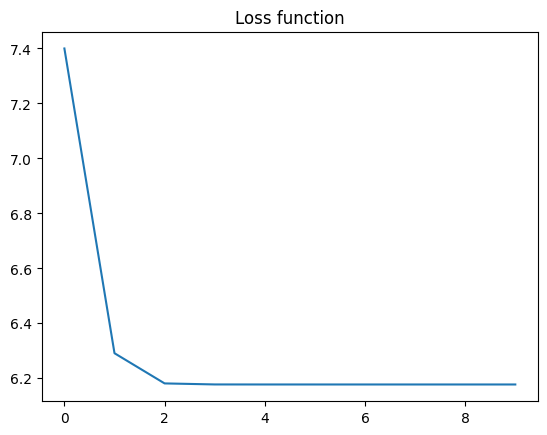

loss functions: 
[7.400074285271067, 6.2911656705761, 6.181303439424708, 6.177546755291766, 6.177427535259074, 6.17742199797238, 6.177421692018325, 6.177421674125735, 6.177421673058178, 6.1774216729939715]


In [63]:
supervised_set = [
    [
        
    ],
]
ssmc_fcm = SSMC_FCM(
    dataset=dataset, 
    fields_len=data_field_len, 
    fields_weight=data_field_weight,
    n_clusters=5, 
    identity=identity,
    supervised_set=supervised_set,
)
ssmc_fcm.clustering()
ssmc_fcm.show_cluster_members()
ssmc_fcm.show_loss_function()

In [60]:
identity_mapping = {iden: idx for idx, iden in enumerate(identity)}
for cluster in ssmc_fcm.pred_labels:
    count = sum([cluster.count(x) for x in result_set])
    print(f"Accuracy: {round(100 * count / len(result_set), 2)}% ({count} in {len(cluster)} of {len(ssmc_fcm.dataset)})")
    # print([identity.index(i) for i in cluster])
    # display(excel_data_df.loc[[identity.index(i) for i in cluster]].iloc[:, [1, *cluster_fields]])

Accuracy: 25.0% (3 in 25 of 41)
Accuracy: 75.0% (9 in 15 of 41)
Accuracy: 0.0% (0 in 0 of 41)
Accuracy: 0.0% (0 in 0 of 41)
Accuracy: 0.0% (0 in 1 of 41)


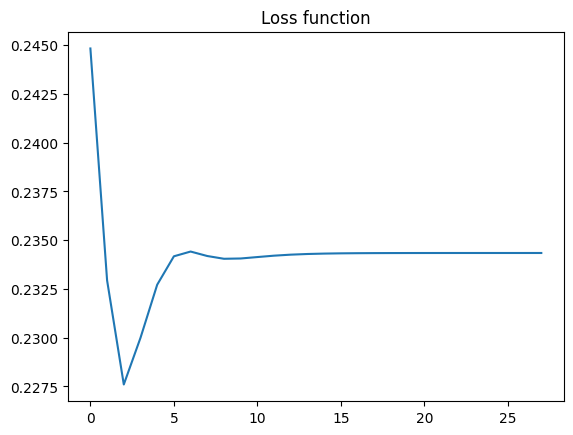

loss functions: 
[0.2448332104446425, 0.2329365856657188, 0.22759633114363687, 0.2299903430736, 0.23271462515892563, 0.23417162093436447, 0.23441586090662572, 0.2341862100061298, 0.2340446835254877, 0.23405966430035377, 0.2341332464588375, 0.2342043659674041, 0.23425625321941507, 0.23429010449602775, 0.23431105583919737, 0.23432367893285683, 0.2343311739638151, 0.234335586728754, 0.2343381712443672, 0.23433967975566306, 0.23434055810417334, 0.23434106862266982, 0.2343413649457818, 0.23434153675919492, 0.23434163629516097, 0.23434169391948975, 0.23434172726139169, 0.23434174654453452]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0
Accuracy: 58.33% (7 in 13 of 41)


,1. Bạn tên là,10. Trình độ tiếng anh
0,Nguyễn Đình Bắc,IELTS 6.5
1,Ngô Ngọc Sâm,IELTS 5.5
1,Ngô Ngọc Sâm,IELTS 5.5
5,Trần Văn Cường,IELTS 7.0
7,Lê Phạm Thủy Tiên,IELTS 6.5
14,Nguyễn Khắc Dũng,IELTS (test thử ở trung tâm): 695
19,Phạm Ngọc Quân,Em đang ôn thi IELTS ạ
23,Nguyễn Tống Minh,IELTS 6.5
25,Phạm Tiến Sơn,IELTS 7.5 (đã qua hạn)
28,Phạm Quang Nghĩa,Ielts 7.5 đã hết hạn


Accuracy: 16.67% (2 in 5 of 41)


,1. Bạn tên là,10. Trình độ tiếng anh
4,Nguyễn Thanh Hà,Đọc hiểu tài liệu Tiếng Anh tốt
17,Dương Hữu Huynh,"Không có, có thể đọc, nghe hiểu tài liệu tốt n..."
4,Nguyễn Thanh Hà,Đọc hiểu tài liệu Tiếng Anh tốt
24,Ngô Thị Thu Huyền,between B1 and B2
34,Phạm Minh Quý,"Tầm trung, có khả năng giao tiếp hằng ngày bằn..."


Accuracy: 8.33% (1 in 17 of 41)


,1. Bạn tên là,10. Trình độ tiếng anh
3,Vũ Khắc Long,
6,Nguyễn Ngọc Dũng,B2
8,Đào Nguyễn Huy Hoàng,
9,Lê Thành Long,
10,Trương Đăng Biển,
11,Nguyễn Việt Anh,Không
12,Ninh Thành Vinh,
13,Hoàng Danh Quân,Không có
15,Nguyễn Quang Tùng,
18,Phạm Hoàng Liên Hương,Không


Accuracy: 16.67% (2 in 6 of 41)


,1. Bạn tên là,10. Trình độ tiếng anh
16,Chu Nhật Minh,700 toeic
27,Vũ Xuân Bắc,685 Toeic
29,Trần Minh Hiếu,toeic nội bộ: 875
31,Phạm Huy Hà Thái,980 Toeic
32,Đào Quang Anh,Mình chưa thi Toeic nội bộ nhưng mình làm 1 và...
37,Lại Trọng Chiến,TOEIC


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,10. Trình độ tiếng anh


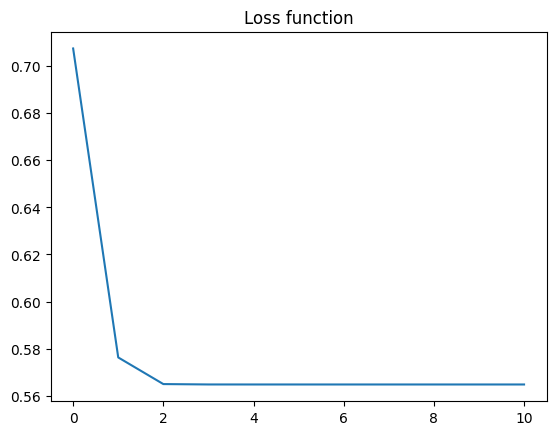

loss functions: 
[0.7074839057698519, 0.5762850307230449, 0.5649761574659445, 0.5648133205654702, 0.5648064967949702, 0.5648058949371765, 0.5648058205902551, 0.5648058104598175, 0.5648058090471051, 0.5648058088490742, 0.5648058088212832]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 1
Accuracy: 33.33% (4 in 17 of 41)


,1. Bạn tên là,3. Bạn đang quan tâm về lĩnh vực nào? Bạn đã biết gì về lĩnh vực này?
0,Nguyễn Đình Bắc,Em đang quan tâm đến web/app development. Hiện...
3,Vũ Khắc Long,BackEnd Developer. BackEnd là tất cả những phầ...
5,Trần Văn Cường,Hiện tại em đang quan tâm đến 2 lĩnh vực là Ar...
9,Lê Thành Long,"Lập trình web, AI, Machine Learning và Deep Le..."
10,Trương Đăng Biển,"Mình đang tìm hiểu về AI , mình đã tìm hiểu về..."
11,Nguyễn Việt Anh,Em đang quan tâm về mảng lập trình web và lập ...
12,Ninh Thành Vinh,"Mình quan tâm về web và blockchain, kiến thức ..."
15,Nguyễn Quang Tùng,Thiết kế và phát triển game
16,Chu Nhật Minh,"developer, sử dụng được 1 số ngôn ngữ"
23,Nguyễn Tống Minh,- Machine Learning\n- Data Engineer


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,3. Bạn đang quan tâm về lĩnh vực nào? Bạn đã biết gì về lĩnh vực này?


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,3. Bạn đang quan tâm về lĩnh vực nào? Bạn đã biết gì về lĩnh vực này?


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,3. Bạn đang quan tâm về lĩnh vực nào? Bạn đã biết gì về lĩnh vực này?


Accuracy: 66.67% (8 in 24 of 41)


,1. Bạn tên là,3. Bạn đang quan tâm về lĩnh vực nào? Bạn đã biết gì về lĩnh vực này?
1,Ngô Ngọc Sâm,"Em đang quan tâm đến lập trình game, hiện em đ..."
1,Ngô Ngọc Sâm,"Em đang quan tâm đến lập trình game, hiện em đ..."
4,Nguyễn Thanh Hà,Mình đang quan tâm lĩnh vực AI + Iot sử dụng V...
6,Nguyễn Ngọc Dũng,Khoa học dữ liệu (DS - Data Science) là ngành ...
7,Lê Phạm Thủy Tiên,Em có hứng thú và đang tìm hiểu về lĩnh vực da...
8,Đào Nguyễn Huy Hoàng,-Mình đang quan tâm về lĩnh vực AI (Artificial...
13,Hoàng Danh Quân,"Em đang quan tâm đến lĩnh vực AI, cụ thể là De..."
14,Nguyễn Khắc Dũng,"Chuyên ngành em định theo là IoT, tuy nhiên em..."
17,Dương Hữu Huynh,Nếu lĩnh vực đề cập ở đây là các định hướng ng...
18,Phạm Hoàng Liên Hương,lập trình nhúng và AI


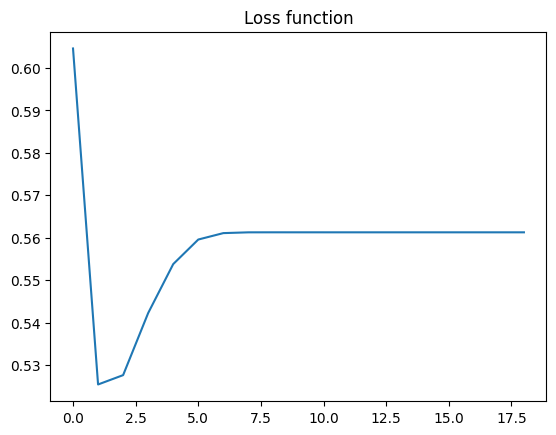

loss functions: 
[0.604565136846076, 0.5254738839486182, 0.5276737603868259, 0.5422884627174375, 0.5538104076068707, 0.5595916983142055, 0.5611044102089551, 0.5612859843273816, 0.5612926240869721, 0.5612907544782113, 0.561290055640711, 0.561289872770005, 0.5612898289961911, 0.5612898188738492, 0.5612898165695569, 0.561289816048841, 0.5612898159315693, 0.5612898159051983, 0.561289815899272]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 2
Accuracy: 75.0% (9 in 25 of 41)


,1. Bạn tên là,"4. Bạn có dự án nào không? Nếu có, bạn hãy điền link Github có những dự án của bạn?"
0,Nguyễn Đình Bắc,https://blendaproject.com/ (Private repo)\nhtt...
4,Nguyễn Thanh Hà,https://github.com/nthzz
6,Nguyễn Ngọc Dũng,https://github.com/DungNasSa10
7,Lê Phạm Thủy Tiên,Hiện tại vì thì về data em chưa có dự án nào h...
9,Lê Thành Long,Lirve Cafe Web và hệ thống gợi ý phim.
11,Nguyễn Việt Anh,Portfolio đơn giản (chưa đầy đủ lắm)\nhttps://...
13,Hoàng Danh Quân,https://github.com/Spidartist/App_Image_Compre...
14,Nguyễn Khắc Dũng,Các dự án của em chủ yếu là clone lại web.\nNh...
16,Chu Nhật Minh,https://github.com/daomanhcuonghust/Web\nhttps...
17,Dương Hữu Huynh,Dự án hoàn toàn sở hữu thì không :v. Nhưng mìn...


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,"4. Bạn có dự án nào không? Nếu có, bạn hãy điền link Github có những dự án của bạn?"


Accuracy: 25.0% (3 in 16 of 41)


,1. Bạn tên là,"4. Bạn có dự án nào không? Nếu có, bạn hãy điền link Github có những dự án của bạn?"
1,Ngô Ngọc Sâm,Hiện em chưa có dự án nào được public bên ngoài.
1,Ngô Ngọc Sâm,Hiện em chưa có dự án nào được public bên ngoài.
3,Vũ Khắc Long,Tôi chưa làm dự án
5,Trần Văn Cường,"Em có một dự án game nho nhỏ , lập trình bằng ..."
8,Đào Nguyễn Huy Hoàng,"Hiện tại là mình chưa có dự án nào, nhưng mình..."
10,Trương Đăng Biển,mình chưa có dự án nào
12,Ninh Thành Vinh,Mình chưa có
15,Nguyễn Quang Tùng,em chưa có sản phẩm
18,Phạm Hoàng Liên Hương,không
25,Phạm Tiến Sơn,Một số dự án ngoài lớp học và link Github đã đ...


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,"4. Bạn có dự án nào không? Nếu có, bạn hãy điền link Github có những dự án của bạn?"


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,"4. Bạn có dự án nào không? Nếu có, bạn hãy điền link Github có những dự án của bạn?"


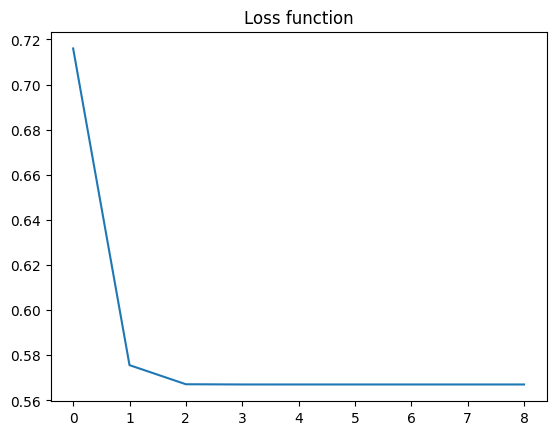

loss functions: 
[0.7160080479716205, 0.575634160784626, 0.5671641366865556, 0.5670639944609235, 0.5670610475849978, 0.5670609097023532, 0.5670609020218084, 0.567060901567626, 0.567060901540239]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 3
Accuracy: 16.67% (2 in 17 of 41)


,1. Bạn tên là,6. Bạn nghĩ mình có thể đóng góp gì cho SINNO với tư cách là thành viên ban Chuyên Môn?
0,Nguyễn Đình Bắc,Nếu được gia nhập SINNO với tư cách thành viên...
3,Vũ Khắc Long,"Nếu được là thành viên ban Chuyên Môn, mình sẽ..."
12,Ninh Thành Vinh,Mình mong muốn có thể tham gia hỗ trợ chuyên m...
13,Hoàng Danh Quân,"Em sẽ đóng góp những ý tưởng, thời gian, công ..."
14,Nguyễn Khắc Dũng,Em mong muốn được góp sức giúp CLB lớn mạnh hơ...
15,Nguyễn Quang Tùng,Em sẽ cố gắng hết sức để hoàn thành xuất sắc n...
17,Dương Hữu Huynh,"Mình là nhiều ý tưởng, tỉ mỉ, cầu toàn trong c..."
18,Phạm Hoàng Liên Hương,"ý tưởng về các dự án, tham gia tích cực trong ..."
24,Ngô Thị Thu Huyền,Mình là sinh viên ngành Data science and Artif...
25,Phạm Tiến Sơn,Nếu có cơ hội trở thành thành viên ban Chuyên ...


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,6. Bạn nghĩ mình có thể đóng góp gì cho SINNO với tư cách là thành viên ban Chuyên Môn?


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,6. Bạn nghĩ mình có thể đóng góp gì cho SINNO với tư cách là thành viên ban Chuyên Môn?


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,6. Bạn nghĩ mình có thể đóng góp gì cho SINNO với tư cách là thành viên ban Chuyên Môn?


Accuracy: 83.33% (10 in 24 of 41)


,1. Bạn tên là,6. Bạn nghĩ mình có thể đóng góp gì cho SINNO với tư cách là thành viên ban Chuyên Môn?
1,Ngô Ngọc Sâm,Một chút hiểu biết của mình về Unity nói riêng...
1,Ngô Ngọc Sâm,Một chút hiểu biết của mình về Unity nói riêng...
4,Nguyễn Thanh Hà,Mình nghĩ rằng dựa vào những project hay kiến ...
5,Trần Văn Cường,"Với tư cách là thành viên của Ban Chuyên môn ,..."
6,Nguyễn Ngọc Dũng,"Mình có hiểu biết về lập trình, ML, DL, DS, AI..."
7,Lê Phạm Thủy Tiên,Có thể thấy kiến thức của em biết không được n...
8,Đào Nguyễn Huy Hoàng,SINNO là câu lạc bộ hàng đầu khu vực với nhiề...
9,Lê Thành Long,Mình nghĩ mình có thể mô hình hóa rõ ràng các ...
10,Trương Đăng Biển,mình đã tìm hiểu về ML và DL đặc biệt là Compu...
11,Nguyễn Việt Anh,Em có thể đóng góp 1 số kiến thức nhỏ về front...


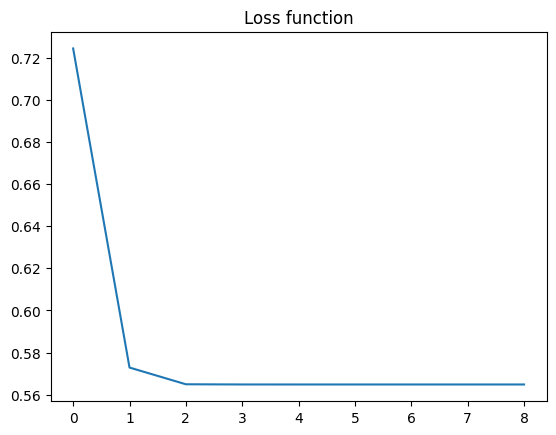

loss functions: 
[0.7242817311243476, 0.5728701815725579, 0.5649307943766481, 0.5648398932116588, 0.5648359680287409, 0.5648357284137715, 0.5648357125414845, 0.564835711461949, 0.5648357113878473]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 4
Accuracy: 75.0% (9 in 22 of 41)


,1. Bạn tên là,"7. Ngoài mong muốn được học hỏi, bạn còn có mong muốn gì khi trở thành một thành viên của ban Chuyên Môn?"
0,Nguyễn Đình Bắc,Là một người khá năng động em hi vọng khi tham...
3,Vũ Khắc Long,Mình mong muốn được đóng góp cho clb để clb ph...
4,Nguyễn Thanh Hà,Mình mong muốn kết bạn và giao lưu với các bạn...
6,Nguyễn Ngọc Dũng,"Ngoài việc học hỏi, mình mong muốn được tiếp x..."
8,Đào Nguyễn Huy Hoàng,"Ngoài mong muốn được học hỏi, nếu mình được tr..."
9,Lê Thành Long,Mình muốn trở thành một leader giỏi
10,Trương Đăng Biển,mình hi vọng có thể gặp gỡ các thành viên siêu...
11,Nguyễn Việt Anh,"Được giao lưu cùng mọi người, mở rộng mối quan..."
12,Ninh Thành Vinh,"Giao lưu và kết bạn với các thành viên khác, c..."
15,Nguyễn Quang Tùng,Em muốn được giao lưu và kết bạn với các thành...


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,"7. Ngoài mong muốn được học hỏi, bạn còn có mong muốn gì khi trở thành một thành viên của ban Chuyên Môn?"


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,"7. Ngoài mong muốn được học hỏi, bạn còn có mong muốn gì khi trở thành một thành viên của ban Chuyên Môn?"


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,"7. Ngoài mong muốn được học hỏi, bạn còn có mong muốn gì khi trở thành một thành viên của ban Chuyên Môn?"


Accuracy: 25.0% (3 in 19 of 41)


,1. Bạn tên là,"7. Ngoài mong muốn được học hỏi, bạn còn có mong muốn gì khi trở thành một thành viên của ban Chuyên Môn?"
1,Ngô Ngọc Sâm,Được làm quen với các anh chị và các bạn tài n...
1,Ngô Ngọc Sâm,Được làm quen với các anh chị và các bạn tài n...
5,Trần Văn Cường,Để được giao lưu với các anh chị và các bạn có...
7,Lê Phạm Thủy Tiên,"Thực ra ngoài mong muốn được học hỏi, em cũng ..."
13,Hoàng Danh Quân,Em muốn được mở rộng mạng lưới các mối quan hệ...
14,Nguyễn Khắc Dũng,"Ngoài học hỏi, em cũng mong muốn cải thiện khả..."
16,Chu Nhật Minh,gặp gỡ và làm việc cùng những người bạn giỏi khác
17,Dương Hữu Huynh,Ngoài được học hỏi thì mình mong muốn nhất khi...
18,Phạm Hoàng Liên Hương,"mở rộng mối quan hệ, có thêm nhiều kinh nghiệm..."
20,Hoàng Minh Đức,Chắc chắn đó là được làm việc và trau dồi tron...


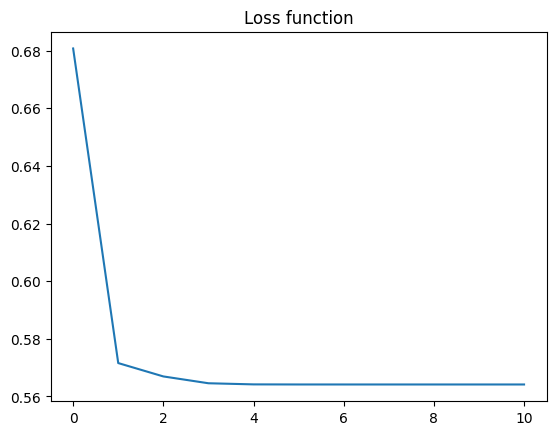

loss functions: 
[0.6807296447822277, 0.5715722045087072, 0.5669377042792616, 0.5645693803956272, 0.564178335403215, 0.5641482931285724, 0.564146091770952, 0.564145923737664, 0.564145910533701, 0.5641459094817204, 0.5641459093974458]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 5
Accuracy: 8.33% (1 in 2 of 41)


,1. Bạn tên là,8. Hãy nêu chi tiết một ý tưởng về công nghệ mà bạn đang muốn thực hiện.
15,Nguyễn Quang Tùng,em đang muốn phát triển 1 game di động 2D thuộ...
19,Phạm Ngọc Quân,Hiện em đang có ý tưởng về một ứng dụng gợi ý ...


Accuracy: 16.67% (2 in 17 of 41)


,1. Bạn tên là,8. Hãy nêu chi tiết một ý tưởng về công nghệ mà bạn đang muốn thực hiện.
0,Nguyễn Đình Bắc,Hiện tại em đang thực hiện 1 dự án cá nhân về ...
3,Vũ Khắc Long,Mình muốn tạo một web lưu điểm và tính điểm GP...
10,Trương Đăng Biển,mình đang muốn xây dựng 1 phần mềm mô hình lại...
11,Nguyễn Việt Anh,"Một trang web để đăng tải các loại meme, nơi m..."
16,Chu Nhật Minh,Hiện tại chưa có ý tưởng nào
17,Dương Hữu Huynh,Hiện tại mình đang có plan về TUI app. Một chú...
18,Phạm Hoàng Liên Hương,chưa có ý tưởng
23,Nguyễn Tống Minh,ML Autotrading: Ứng dụng máy học nhằm dự đoán ...
27,Vũ Xuân Bắc,Hiện tại em muốn làm một thư viện số cho sinh ...
32,Đào Quang Anh,Mình đang lên kế hoạch cho một con game tương ...


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,8. Hãy nêu chi tiết một ý tưởng về công nghệ mà bạn đang muốn thực hiện.


Accuracy: 75.0% (9 in 22 of 41)


,1. Bạn tên là,8. Hãy nêu chi tiết một ý tưởng về công nghệ mà bạn đang muốn thực hiện.
1,Ngô Ngọc Sâm,Em có một ý tưởng về một tựa game thuộc dạng R...
1,Ngô Ngọc Sâm,Em có một ý tưởng về một tựa game thuộc dạng R...
4,Nguyễn Thanh Hà,"Ý tưởng của mình là áp dụng công nghệ AR, Game..."
5,Trần Văn Cường,Một trong những dự án mà em muốn thực hiện là ...
6,Nguyễn Ngọc Dũng,Việc phân loại file có bug hay không và xác đị...
7,Lê Phạm Thủy Tiên,Hiện tại em có ý tưởng làm project về DE:\n- T...
8,Đào Nguyễn Huy Hoàng,Một ý tưởng mà mình ấp ủ cách đây một số thời ...
9,Lê Thành Long,Hệ thống gợi ý môn học module hay môn học bổ t...
12,Ninh Thành Vinh,Mình muốn thành lập một trang web kết nối nhữn...
13,Hoàng Danh Quân,- Ý tưởng: Em muốn xây dựng 1 web app có khả n...


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,8. Hãy nêu chi tiết một ý tưởng về công nghệ mà bạn đang muốn thực hiện.


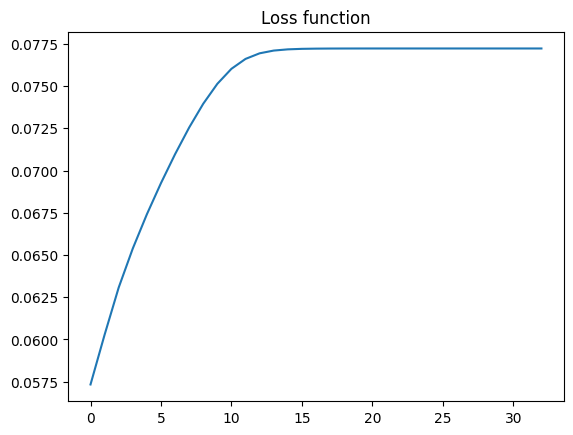

loss functions: 
[0.057334701054588495, 0.060281641022882956, 0.06307498400268301, 0.0653864109450718, 0.06741227494890437, 0.06925748600752378, 0.07096871187738445, 0.07254757695302987, 0.07395729143770965, 0.07513569902080491, 0.07602486833632409, 0.07661083052683229, 0.07694223088633104, 0.07710470739263667, 0.07717654294473818, 0.07720675344411086, 0.07721935830128426, 0.07722467143279046, 0.07722693581854133, 0.07722790714350652, 0.07722832494274057, 0.07722850479904991, 0.07722858223064989, 0.07722861556244565, 0.0772286299088488, 0.07722863608313872, 0.07722863874022858, 0.07722863988366216, 0.0772286403757115, 0.07722864058745184, 0.07722864067856676, 0.07722864071777666, 0.07722864073464843]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 6
Accuracy: 41.67% (5 in 23 of 41)


,1. Bạn tên là,2. Có thể cho SINNO hỏi bạn biết đến CLB qua đâu không?
0,Nguyễn Đình Bắc,Fanpage CLB SINNO
1,Ngô Ngọc Sâm,Fanpage CLB SINNO
1,Ngô Ngọc Sâm,Fanpage CLB SINNO
3,Vũ Khắc Long,Fanpage CLB SINNO
6,Nguyễn Ngọc Dũng,Fanpage CLB SINNO
8,Đào Nguyễn Huy Hoàng,Fanpage CLB SINNO
9,Lê Thành Long,Fanpage CLB SINNO
10,Trương Đăng Biển,Fanpage CLB SINNO
11,Nguyễn Việt Anh,Fanpage CLB SINNO
16,Chu Nhật Minh,Fanpage CLB SINNO


Accuracy: 25.0% (3 in 5 of 41)


,1. Bạn tên là,2. Có thể cho SINNO hỏi bạn biết đến CLB qua đâu không?
4,Nguyễn Thanh Hà,Từ các sự kiện SINNO tổ chức
5,Trần Văn Cường,Từ các sự kiện SINNO tổ chức
14,Nguyễn Khắc Dũng,Từ các sự kiện SINNO tổ chức
15,Nguyễn Quang Tùng,Từ các sự kiện SINNO tổ chức
4,Nguyễn Thanh Hà,Từ các sự kiện SINNO tổ chức


Accuracy: 16.67% (2 in 9 of 41)


,1. Bạn tên là,2. Có thể cho SINNO hỏi bạn biết đến CLB qua đâu không?
7,Lê Phạm Thủy Tiên,Thầy cô/Bạn bè giới thiệu
12,Ninh Thành Vinh,Thầy cô/Bạn bè giới thiệu
13,Hoàng Danh Quân,Thầy cô/Bạn bè giới thiệu
27,Vũ Xuân Bắc,Thầy cô/Bạn bè giới thiệu
29,Trần Minh Hiếu,Thầy cô/Bạn bè giới thiệu
30,Kha Minh Bảo,Thầy cô/Bạn bè giới thiệu
32,Đào Quang Anh,Thầy cô/Bạn bè giới thiệu
34,Phạm Minh Quý,Thầy cô/Bạn bè giới thiệu
35,Lê Quang Huy,Thầy cô/Bạn bè giới thiệu


Accuracy: 16.67% (2 in 3 of 41)


,1. Bạn tên là,2. Có thể cho SINNO hỏi bạn biết đến CLB qua đâu không?
23,Nguyễn Tống Minh,Tôi là từng là CTV của SINNO
31,Phạm Huy Hà Thái,Mình biết qua bạn Huy và anh Minh Ban Chuyên Môn
33,Nguyễn Mậu Trà,Khum


Accuracy: 0.0% (0 in 1 of 41)


,1. Bạn tên là,2. Có thể cho SINNO hỏi bạn biết đến CLB qua đâu không?
26,Nguyễn Hoàng Sơn,CLB HIEC


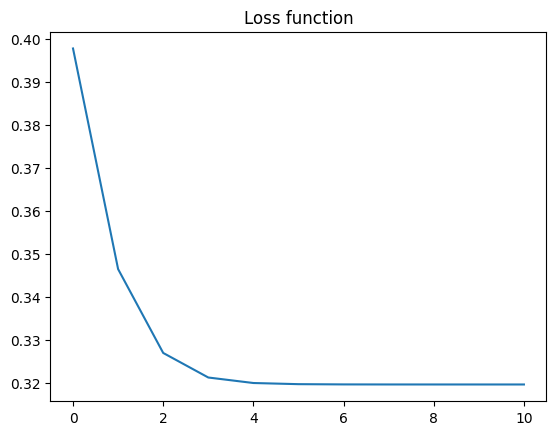

loss functions: 
[0.3977502963675487, 0.34641504672061685, 0.32690571933306983, 0.32119185600027234, 0.31991046682418167, 0.31964320987461137, 0.31958585310373533, 0.31957342995912913, 0.3195707334244178, 0.3195701478415135, 0.3195700206607956]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] 7
Accuracy: 33.33% (4 in 18 of 41)


,1. Bạn tên là,3. Bạn có đề xuất gì liên quan đến việc hoạt động của SINNO không?
0,Nguyễn Đình Bắc,
6,Nguyễn Ngọc Dũng,Không
10,Trương Đăng Biển,
11,Nguyễn Việt Anh,Không
12,Ninh Thành Vinh,không ạ
14,Nguyễn Khắc Dũng,Dạ em không ạ
16,Chu Nhật Minh,Không
22,Phùng Tiến Đạt,em không
26,Nguyễn Hoàng Sơn,
28,Phạm Quang Nghĩa,Không


Accuracy: 16.67% (2 in 9 of 41)


,1. Bạn tên là,3. Bạn có đề xuất gì liên quan đến việc hoạt động của SINNO không?
1,Ngô Ngọc Sâm,Hiện tại em chưa có đề xuất ạ.
1,Ngô Ngọc Sâm,Hiện tại em chưa có đề xuất ạ.
3,Vũ Khắc Long,Mình không có đề xuất gì.
9,Lê Thành Long,Mình cũng chưa biết nhiều nhưng nếu may mắn đư...
19,Phạm Ngọc Quân,Hiện tại em chưa có đề xuất gì ạ.
20,Hoàng Minh Đức,Dạ khong ạ ^^
23,Nguyễn Tống Minh,Do chưa có trải nghiệm thực tế trong SINNO nên...
35,Lê Quang Huy,có nhiều sự kiện tương tác với sinh viên hơn
39,Nguyễn Đình Dũng,Mình chưa có đề xuất gì


Accuracy: 50.0% (6 in 13 of 41)


,1. Bạn tên là,3. Bạn có đề xuất gì liên quan đến việc hoạt động của SINNO không?
4,Nguyễn Thanh Hà,Mình đề xuất nên tổ chức nhiều sự kiện liên qu...
5,Trần Văn Cường,Em có theo dõi và cũng có tham gia một cuộc th...
7,Lê Phạm Thủy Tiên,Em có theo dõi CLB trong vòng 1 năm qua trên f...
8,Đào Nguyễn Huy Hoàng,"Theo mình thì mỗi khoảng thời gian nào đó, SIN..."
13,Hoàng Danh Quân,"Em mong SINNO tổ chức nhiều hoạt động hơn, với..."
15,Nguyễn Quang Tùng,Em mong muốn SINNO có thể chia sẻ thêm nhiều t...
17,Dương Hữu Huynh,Fanpage của các lâu bộ có rất nhiều bài chia s...
18,Phạm Hoàng Liên Hương,có thêm nhiều bài viết hơn về SINNO trên fanpa...
4,Nguyễn Thanh Hà,Mình đề xuất nên tổ chức nhiều sự kiện liên qu...
25,Phạm Tiến Sơn,Tổ chức nhiều đợt tuyển thành viên hơn (Mình k...


Accuracy: 0.0% (0 in 1 of 41)


,1. Bạn tên là,3. Bạn có đề xuất gì liên quan đến việc hoạt động của SINNO không?
24,Ngô Thị Thu Huyền,đề xuất SINNO có thêm nhiều hoạt động tương tá...


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,3. Bạn có đề xuất gì liên quan đến việc hoạt động của SINNO không?


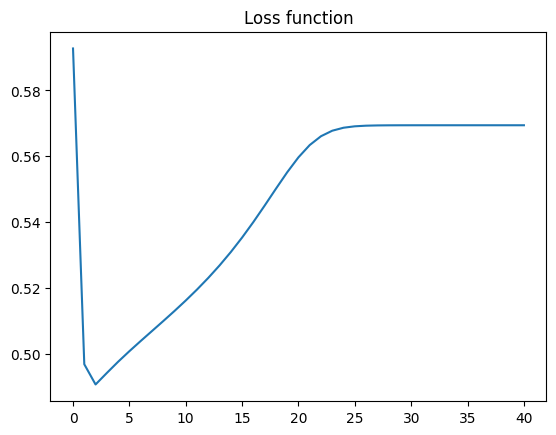

loss functions: 
[0.5927181931796544, 0.4968298642031167, 0.49068889644927915, 0.4941843504937562, 0.4975877927756966, 0.5007954031760463, 0.5038775172997856, 0.5069017137546546, 0.5099264636619468, 0.5130045505254396, 0.5161860299323134, 0.5195200664383741, 0.5230555262961656, 0.5268398650571003, 0.5309153057797059, 0.5353106009566089, 0.5400260199115239, 0.5450094911098035, 0.5501254058474943, 0.5551283778776891, 0.5596728735818013, 0.5633979214489099, 0.5660803901909057, 0.5677510542942812, 0.5686536238612541, 0.5690858125935718, 0.5692751207027551, 0.5693533298747944, 0.5693845201987315, 0.5693967093942738, 0.5694014186912207, 0.569403226349171, 0.5694039176272754, 0.5694041814051495, 0.5694042819264784, 0.5694043202034446, 0.5694043347717833, 0.5694043403149288, 0.5694043424236792, 0.5694043432258125, 0.56940434353091]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] 8
Accuracy: 8.33% (1 in 14 of 41)


,1. Bạn tên là,4. Bạn mong muốn nhận được gì từ phía CLB SINNO?
0,Nguyễn Đình Bắc,
10,Trương Đăng Biển,
11,Nguyễn Việt Anh,"Nhận được các kiến thức về lập trình, mở rộng ..."
16,Chu Nhật Minh,Kỷ niệm đẹp thời sinh viên
17,Dương Hữu Huynh,
18,Phạm Hoàng Liên Hương,kiến thức và các mối quan hệ
26,Nguyễn Hoàng Sơn,
32,Đào Quang Anh,Mình muốn có được một môi trường tốt để phát t...
33,Nguyễn Mậu Trà,Chưa có
36,Nguyễn Minh Châu,


Accuracy: 91.67% (11 in 27 of 41)


,1. Bạn tên là,4. Bạn mong muốn nhận được gì từ phía CLB SINNO?
1,Ngô Ngọc Sâm,Em mong có thể nhận được sự trợ giúp từ các th...
1,Ngô Ngọc Sâm,Em mong có thể nhận được sự trợ giúp từ các th...
3,Vũ Khắc Long,Mình mong muốn nhận được mail báo trúng tuyển ...
4,Nguyễn Thanh Hà,Mình mong muốn nhận được sự đón nhận là thành ...
5,Trần Văn Cường,Mong muốn hiện tại của em chỉ đơn giản là được...
6,Nguyễn Ngọc Dũng,"Mong muốn được tham gia CLB để học hỏi, làm việc"
7,Lê Phạm Thủy Tiên,Chắc về những mong muốn bản thân em cũng đã ch...
8,Đào Nguyễn Huy Hoàng,"Với một CLB lớn như là SINNO, thì mình chỉ mon..."
9,Lê Thành Long,"Mình muốn hoàn thiện bản thân, kỹ năng mềm đặc..."
12,Ninh Thành Vinh,"Mình mong nhận được kiến thức, kĩ năng, trải n..."


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,4. Bạn mong muốn nhận được gì từ phía CLB SINNO?


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,4. Bạn mong muốn nhận được gì từ phía CLB SINNO?


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,4. Bạn mong muốn nhận được gì từ phía CLB SINNO?


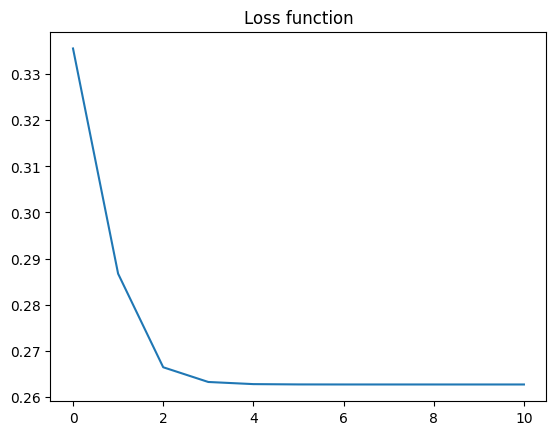

loss functions: 
[0.3355848739237041, 0.2867236182351051, 0.2664255798171493, 0.2632297899697036, 0.2627664600236984, 0.26269947028771207, 0.262689717327296, 0.26268829875591376, 0.26268809278548116, 0.2626880629165962, 0.26268805858851724]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] 9
Accuracy: 33.33% (4 in 22 of 41)


,1. Bạn tên là,5. Bạn còn muốn hỏi thêm gì về SINNO không?
0,Nguyễn Đình Bắc,
6,Nguyễn Ngọc Dũng,Không
8,Đào Nguyễn Huy Hoàng,
10,Trương Đăng Biển,
11,Nguyễn Việt Anh,Không
12,Ninh Thành Vinh,không ạ
13,Hoàng Danh Quân,Không ạ
15,Nguyễn Quang Tùng,
17,Dương Hữu Huynh,
20,Hoàng Minh Đức,Dạ không ạ ^^


Accuracy: 16.67% (2 in 9 of 41)


,1. Bạn tên là,5. Bạn còn muốn hỏi thêm gì về SINNO không?
1,Ngô Ngọc Sâm,Hiện tại em chưa có câu hỏi nào ạ.
3,Vũ Khắc Long,Trong SINNO có nhiều giảng viên của SOICT ko ạ
7,Lê Phạm Thủy Tiên,Hiện tại thì không. Em chỉ muốn cảm ơn mọi ngư...
9,Lê Thành Long,Mình có thể rèn luyện khả năng thuyết trình ha...
14,Nguyễn Khắc Dũng,Em không có câu hỏi gì thêm và em xin cảm ơn S...
16,Chu Nhật Minh,Đợt này ban Chuyên môn tuyển bao nhiêu thành v...
27,Vũ Xuân Bắc,Tỉ lệ nữ trong CLB là bao nhiêu ạ?
28,Phạm Quang Nghĩa,"Mình muốn biết trong những năm vừa qua, SINNO ..."
29,Trần Minh Hiếu,Không ạ. Em chúc CLB sẽ ngày càng phát triển h...


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,5. Bạn còn muốn hỏi thêm gì về SINNO không?


Accuracy: 33.33% (4 in 5 of 41)


,1. Bạn tên là,5. Bạn còn muốn hỏi thêm gì về SINNO không?
4,Nguyễn Thanh Hà,Mình muốn hỏi là khi mình vào Ban chuyên môn t...
19,Phạm Ngọc Quân,Em có thắc mắc đó là hiện tại kĩ năng lập trìn...
4,Nguyễn Thanh Hà,Mình muốn hỏi là khi mình vào Ban chuyên môn t...
30,Kha Minh Bảo,Phòng của SINNO nằm ở đâu ạ? Liệu trong những ...
32,Đào Quang Anh,Ban chuyên môn của SINNO 1 tuần làm việc mấy ...


Accuracy: 16.67% (2 in 5 of 41)


,1. Bạn tên là,5. Bạn còn muốn hỏi thêm gì về SINNO không?
1,Ngô Ngọc Sâm,Hiện tại em chưa có câu hỏi nào ạ.
5,Trần Văn Cường,"Hiện tại em chưa có , chắc đến buổi phỏng vấn ..."
18,Phạm Hoàng Liên Hương,Ở viện khác có cơ hội vào ban chuyên môn được ...
31,Phạm Huy Hà Thái,Nhận bản thân lười tự tạo dự án có bị loại khô...
39,Nguyễn Đình Dũng,Mình không có câu hỏi gì thêm


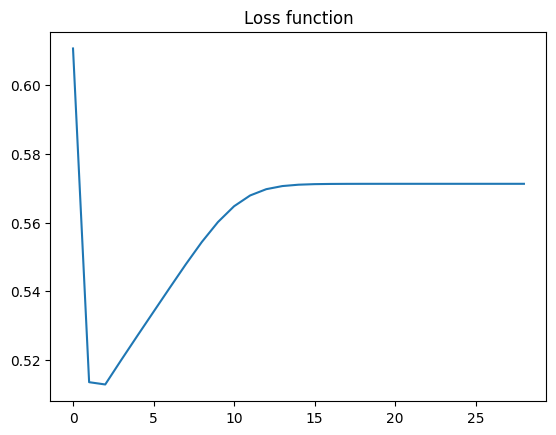

loss functions: 
[0.6107128627451422, 0.513520429833068, 0.5128529984943281, 0.5200230359377513, 0.5270605360229308, 0.5340194104756057, 0.5409638875943057, 0.547825502363341, 0.5543615189224202, 0.560159178838276, 0.5647597123502802, 0.5679085073180582, 0.569734108321042, 0.5706400949514068, 0.5710381173217332, 0.5711992309931073, 0.5712613152342004, 0.5712845856387488, 0.571293176820426, 0.5712963225154717, 0.5712974690792352, 0.5712978859124255, 0.571298037228212, 0.5712980921104139, 0.5712981120060476, 0.5712981192163369, 0.5712981218289139, 0.5712981227754528, 0.5712981231183625]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 10
Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,1. Nghề tay trái của bạn (tài lẻ). Hãy bật mí cho SINNO nghe đi.


Accuracy: 75.0% (9 in 26 of 41)


,1. Bạn tên là,1. Nghề tay trái của bạn (tài lẻ). Hãy bật mí cho SINNO nghe đi.
1,Ngô Ngọc Sâm,Diễn kịch với những tông giọng khác nhau
1,Ngô Ngọc Sâm,Diễn kịch với những tông giọng khác nhau
4,Nguyễn Thanh Hà,Hài độc thoại
5,Trần Văn Cường,"Hát , làm powerpoint nghệ thuật , đánh cầu lôn..."
8,Đào Nguyễn Huy Hoàng,"Đá bóng, bóng chuyền, tấu hài cho mọi người...."
9,Lê Thành Long,"Guitar, piano, gia sư lập trình và các môn đại..."
10,Trương Đăng Biển,mình là 1 siu sao bóng đá ~~
11,Nguyễn Việt Anh,"Gấp giấy, thỉnh thoảng luyện code trên Codingame"
12,Ninh Thành Vinh,kể chuyện hài (có lẽ thế)
13,Hoàng Danh Quân,Em có biết Nhảy Popping 1 chút ạ


Accuracy: 25.0% (3 in 15 of 41)


,1. Bạn tên là,1. Nghề tay trái của bạn (tài lẻ). Hãy bật mí cho SINNO nghe đi.
0,Nguyễn Đình Bắc,Chơi điện tử
3,Vũ Khắc Long,"Cổ vũ nhiệt tình, vỗ tay to :3"
6,Nguyễn Ngọc Dũng,Không có
7,Lê Phạm Thủy Tiên,tài năng nghệ thuật thì em không có =)))
15,Nguyễn Quang Tùng,
17,Dương Hữu Huynh,Mình không có.
18,Phạm Hoàng Liên Hương,không
20,Hoàng Minh Đức,"Em biết chơi guitar ạ,nhưng lâu rồi cũng không..."
25,Phạm Tiến Sơn,Chắc là không có
27,Vũ Xuân Bắc,Thổi sáo


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,1. Nghề tay trái của bạn (tài lẻ). Hãy bật mí cho SINNO nghe đi.


Accuracy: 0.0% (0 in 0 of 41)


,1. Bạn tên là,1. Nghề tay trái của bạn (tài lẻ). Hãy bật mí cho SINNO nghe đi.


In [61]:
identity_mapping = {iden: idx for idx, iden in enumerate(identity)}
for i in range(len(cluster_fields)):
    __weight = [0] * len(cluster_fields)
    __weight[i] = 1
    ssmc_fcm = SSMC_FCM(
        dataset=dataset, 
        fields_len=data_field_len, 
        fields_weight=__weight,
        n_clusters=5, 
        identity=identity,
        supervised_set=supervised_set, 
    )
    ssmc_fcm.clustering()
    ssmc_fcm.show_loss_function()
    print(__weight, i)
    for cluster in ssmc_fcm.pred_labels:
        count = sum([cluster.count(x) for x in result_set])
        print(f"Accuracy: {round(100 * count / len(result_set), 2)}% ({count} in {len(cluster)} of {len(ssmc_fcm.dataset)})")
        display(excel_data_df.loc[[identity.index(i) for i in cluster]].iloc[:, [1, cluster_fields[i]]])
    print()